# **Pseudo-coloring Grayscale Images**
# **Digital Image Processing || Project || Spring 2024 || BSCS 6B**


---


## **Group Memebers:**
### 1) Aniqa Hanif Khan (L20-1200)
### 2) Khadija Saleem (L20-1061)
### 3) Aisha Muhammad Nawaz (L20-0921)

**Version 1 (Correct One)**

<ipython-input-17-20e3b0272ed1>:19: RuntimeWarning: invalid value encountered in cast
  matrix_converter[0, gray_level] = [mean_red, mean_green, mean_blue]


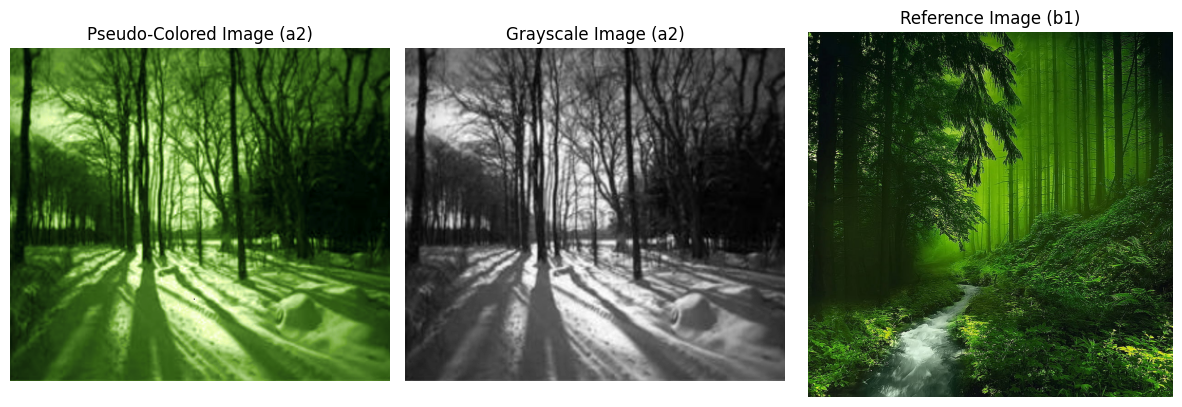

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert an image to grayscale using OpenCV
def convert_to_grayscale(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

# Function to create a matrix converter for pseudo-coloring
def create_matrix_converter(color_image):
    matrix_converter = np.zeros((4, 256, 3), dtype=np.uint8)
    gray_image = convert_to_grayscale(color_image)
    for gray_level in range(256):
        gray_indices = np.where(gray_image == gray_level)
        mean_red = np.mean(color_image[gray_indices][:, 0])
        mean_green = np.mean(color_image[gray_indices][:, 1])
        mean_blue = np.mean(color_image[gray_indices][:, 2])
        matrix_converter[0, gray_level] = [mean_red, mean_green, mean_blue]
        matrix_converter[1:, gray_level] = [gray_level, gray_level, gray_level]
    return matrix_converter

# Function to apply pseudo-coloring to a grayscale image
def pseudo_color(gray_image, matrix_converter):
    pseudo_color_image = np.zeros((gray_image.shape[0], gray_image.shape[1], 3), dtype=np.uint8)
    for x in range(gray_image.shape[0]):
        for y in range(gray_image.shape[1]):
            gray_level = gray_image[x, y]
            color_values = matrix_converter[:, gray_level, :]
            pseudo_color_image[x, y] = color_values[0]
    return pseudo_color_image

# Load color image
color_image = cv2.imread('/content/b4.jpg')

# Create Matrix Converter
matrix_converter = create_matrix_converter(color_image)

# Load grayscale image
gray_image = cv2.imread('/content/a2.PNG', cv2.IMREAD_GRAYSCALE)

# Apply pseudo-coloring to the grayscale image
pseudo_color_image_a2 = pseudo_color(gray_image, matrix_converter)

# Display the images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(pseudo_color_image_a2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Pseudo-Colored Image (a2)')

plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image (a2)')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Reference Image (b1)')

plt.tight_layout()
plt.show()


**OTHER TRIES**

**VERSION 2**

## ***Phase 1: Preparation and Matrix Converter Creation***

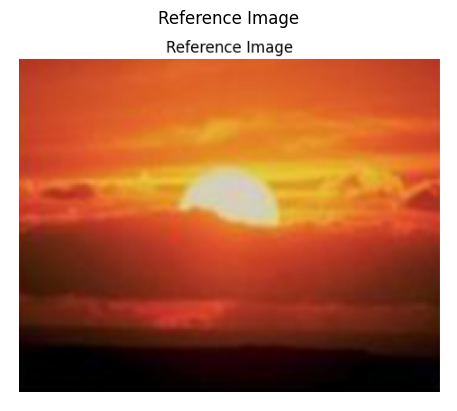

Creating Matrix Converter..
Matrix Converter Created!


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def convert2grayscale(image): # This function converts the reference color image to grayscale using values given in research paper
    grayImage = 0.298 * image[:, :, 0] + 0.587 * image[:, :, 1] + 0.114 * image[:, :, 2]
    grayImage = grayImage.astype(np.uint8)
    return grayImage

def showImage(img): #This function displays the image using matplot library
    # First converting BGR to RGB  as OpenCV reads images in BGR format not RGB
    refImageRGB = cv2.cvtColor(refImage, cv2.COLOR_BGR2RGB)
    plt.imshow(refImageRGB)
    plt.axis('off')
    plt.title('Reference Image')
    plt.show()


def getMatrixConverter(refImage):
    try:
        print('Creating Matrix Converter..')
        matrixConverter = np.zeros((256, 4), dtype=np.uint8)  # Initializing 4 x 256 matrix with zeros in the start
        grayImage = convert2grayscale(refImage)               # Converting color image to grayscale using function defined above

        # Populating the actual values in the Matrix Converter
        for grayLevelValue in range(256):
            grayi = np.where(grayImage == grayLevelValue)
            if len(grayi[0]) > 0:  # To make sure not empty
               # Calculate mean of RGB values from refImage and matrixConverter
                meanRed = (np.mean(refImage[grayi][:, 0]) + matrixConverter[grayLevelValue, 0]) / 2
                meanGreen = (np.mean(refImage[grayi][:, 1]) + matrixConverter[grayLevelValue, 1]) / 2
                meanBlue = (np.mean(refImage[grayi][:, 2]) + matrixConverter[grayLevelValue, 2]) / 2

                # Assigning all the mean values to each column of the current row/gray level
                matrixConverter[grayLevelValue, 0] = grayLevelValue
                matrixConverter[grayLevelValue, 1] = meanRed
                matrixConverter[grayLevelValue, 2] = meanGreen
                matrixConverter[grayLevelValue, 3] = meanBlue

        print('Matrix Converter Created!')
        return matrixConverter

    except Exception as e:
        print(f"Sorry! An error occurred: {e}")
        return None


refImage = cv2.imread('/content/b1.png')                # Loading the reference image
showImage(refImage)                            # Displaying the reference image
matrixConverter = getMatrixConverter(refImage) # Creating Matrix Converter

In [ ]:
matrixConverter

array([[  0,   0,   0,   0],
       [  1,   0,   0,   2],
       [  2,   1,   0,   5],
       ...,
       [253, 127, 127, 127],
       [254, 127, 127, 127],
       [  0,   0,   0,   0]], dtype=uint8)

In [ ]:
# For testing purposes
import pandas as pd
# Converting the matrixConverter to DataFrame
dfMatrixConverter = pd.DataFrame(matrixConverter, columns=['Gray Level (i)', 'Red (R)', 'Green (G)', 'Blue (B)'])
dfMatrixConverter.head()

,Gray Level (i),Red (R),Green (G),Blue (B)
0,0,0,0,0
1,1,0,0,2
2,2,1,0,5
3,3,1,0,8
4,4,1,0,11


## ***Phase 2:  Pseudo-Coloring***

In [ ]:
import numpy as np
import cv2

def pseudoColorImage(image, matrixConverter):
    height, width = image.shape
    colorized_image = np.zeros((height, width, 3), dtype=np.uint16)

    for i in range(height):
        for j in range(width):
            # Step 1: Fetch the grayscale value for the current pixel.
            gray_level = image[i, j]

            # Step 2: Fetch RGB values from the matrix converter for the current grayscale level.
            r, g, b = matrixConverter[gray_level, 1], matrixConverter[gray_level, 2], matrixConverter[gray_level, 3]

            # Step 3: Identify the maximum color component.
            max_index = np.argmax([r, g, b])
            if max_index == 0:  # Red is the maximum
                r *= 2
            elif max_index == 1:  # Green is the maximum
                g *= 1.2
            else:  # Blue is the maximum
                b *= 4



            # Ensure that the values do not exceed 255 after modification
            r, g, b = min(r, 255), min(g, 255), min(b, 255)




            # # Compute value difference between the maximum layer and the two other layers
            # diff_r = 0
            # diff_g = 0
            # diff_b = 0
            # if max_index == 0:  # Red is maximum
            #     diff_g = r - g
            #     diff_b = r - b
            #     g  = gray_level - diff_g
            #     b = gray_level - diff_b
            # elif max_index == 1:  # Green is maximum
            #     diff_r = g - r
            #     diff_b = g - b
            #     r  = gray_level - diff_r
            #     b = gray_level - diff_b
            # else:  # Blue is maximum
            #     diff_r = b - r
            #     diff_g = b - g
            #     g  = gray_level - diff_g
            #     r = gray_level - diff_r
            # matrixConverter[gray_level, 1] = r
            # matrixConverter[gray_level, 2] = g
            # matrixConverter[gray_level, 3] = b


            colorized_image[i, j] = [r, g, b]

    return colorized_image


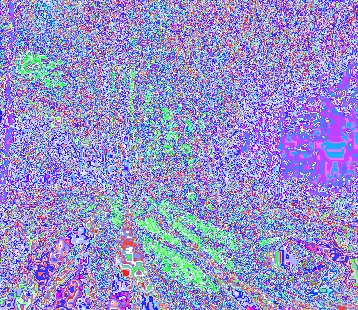

In [ ]:
from IPython.display import Image, display

grayscale_image = cv2.imread('a2.png', cv2.IMREAD_GRAYSCALE)
if grayscale_image is None:
    print("Error loading image")
colorized_image = pseudoColorImage(grayscale_image, matrixConverter)


cv2.imwrite('colorized_image.jpg', colorized_image)
display(Image('colorized_image.jpg'))

**VERSION 3**

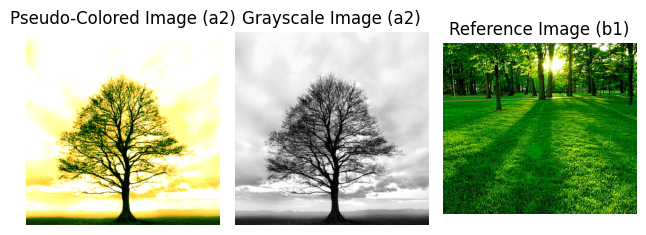

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert an image to grayscale using OpenCV
def convert_to_grayscale(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

# Function to create a matrix converter for pseudo-coloring
def create_matrix_converter(color_image):
    matrix_converter = np.zeros((4, 256, 3), dtype=np.uint8)
    gray_image = convert_to_grayscale(color_image)
    for gray_level in range(256):
        gray_indices = np.where(gray_image == gray_level)
        mean_red = np.mean(color_image[gray_indices][:, 0])
        mean_green = np.mean(color_image[gray_indices][:, 1])
        mean_blue = np.mean(color_image[gray_indices][:, 2])
        matrix_converter[0, gray_level] = [mean_red, mean_green, mean_blue]
        matrix_converter[1:, gray_level] = [gray_level, gray_level, gray_level]
    return matrix_converter

# Function to apply pseudo-coloring to a grayscale image
def pseudo_color(gray_image, matrix_converter):
    pseudo_color_image = np.zeros((gray_image.shape[0], gray_image.shape[1], 3), dtype=np.uint8)
    for x in range(gray_image.shape[0]):
        for y in range(gray_image.shape[1]):
            gray_level = gray_image[x, y]
            color_values = matrix_converter[:, gray_level, :].astype(np.float64)
            max_color_value = np.max(color_values)
            color_values *= [2, 1.2, 4]
            color_values = np.clip(color_values, 0, 255).astype(np.uint8)
            pseudo_color_image[x, y] = color_values[0]
    return pseudo_color_image

# Load color image
color_image = cv2.imread('/content/ref.png')

# Create Matrix Converter
matrix_converter = create_matrix_converter(color_image)

# Load grayscale image
gray_image = cv2.imread('/content/bw.png', cv2.IMREAD_GRAYSCALE)

# Apply pseudo-coloring to the grayscale image
pseudo_color_image_a2 = pseudo_color(gray_image, matrix_converter)

# Display the images
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(pseudo_color_image_a2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Pseudo-Colored Image (a2)')

plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image (a2)')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Reference Image (b1)')

plt.tight_layout()
plt.show()

<ipython-input-16-d7bc3a23e5a2>:19: RuntimeWarning: invalid value encountered in cast
  matrix_converter[0, gray_level] = [mean_red, mean_green, mean_blue]


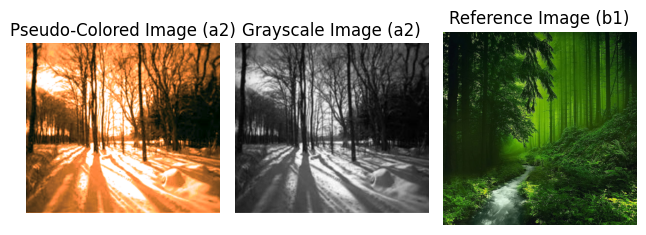

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert an image to grayscale using OpenCV
def convert_to_grayscale(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

# Function to create a matrix converter for pseudo-coloring
def create_matrix_converter(color_image):
    matrix_converter = np.zeros((4, 256, 3), dtype=np.uint8)
    gray_image = convert_to_grayscale(color_image)
    for gray_level in range(256):
        gray_indices = np.where(gray_image == gray_level)
        mean_red = np.mean(color_image[gray_indices][:, 0])
        mean_green = np.mean(color_image[gray_indices][:, 1])
        mean_blue = np.mean(color_image[gray_indices][:, 2])
        matrix_converter[0, gray_level] = [mean_red, mean_green, mean_blue]
        matrix_converter[1:, gray_level] = [gray_level, gray_level, gray_level]
    return matrix_converter

# Function to apply pseudo-coloring to a grayscale image
def pseudo_color(gray_image, matrix_converter):
    pseudo_color_image = np.zeros((gray_image.shape[0], gray_image.shape[1], 3), dtype=np.uint8)
    for x in range(gray_image.shape[0]):
        for y in range(gray_image.shape[1]):
            gray_level = gray_image[x, y]
            color_values = matrix_converter[:, gray_level, :].astype(np.float64)
            max_color_value = np.max(color_values)
            color_values *= [2, 1.2, 4]
            color_values = np.clip(color_values, 0, 255).astype(np.uint8)
            pseudo_color_image[x, y] = color_values[0]
    return pseudo_color_image

# Load color image
color_image = cv2.imread('/content/b4.jpg')

# Create Matrix Converter
matrix_converter = create_matrix_converter(color_image)

# Load grayscale image
gray_image = cv2.imread('/content/a2.PNG', cv2.IMREAD_GRAYSCALE)

# Apply pseudo-coloring to the grayscale image
pseudo_color_image_a2 = pseudo_color(gray_image, matrix_converter)

# Display the images
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(pseudo_color_image_a2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Pseudo-Colored Image (a2)')

plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image (a2)')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Reference Image (b1)')

plt.tight_layout()
plt.show()


## **Reference :**
Zare, M., Jampour, M., & Farrokhi, I. R. (2011, May). A heuristic method for gray images pseudo coloring with histogram and RGB layers. In 2011 IEEE 3rd International Conference on Communication Software and Networks (pp. 524-527). IEEE.